In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

from keras.layers import Dense
from keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

from os.path import exists
import datetime
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [3]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


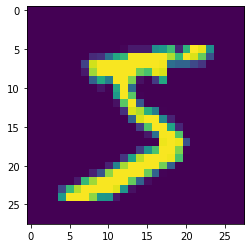

In [4]:
# Plot to see what the data looks like
plt.imshow(x_train[0])

In [5]:
# Make x_train & x_test pixels to 1D vectors
x_train1D = []
x_test1D = []
for x in x_train:
    x_train1D.append(x.flatten())

for x in x_test:
    x_test1D.append(x.flatten())

x_train1D = np.array(x_train1D)/255
x_test1D = np.array(x_test1D)/255

print(x_train.shape, x_train1D.shape)
print(x_test.shape, x_test1D.shape)


(60000, 28, 28) (60000, 784)
(10000, 28, 28) (10000, 784)


In [6]:
# One hot encoding on y_train 
y_trainVect = to_categorical(y_train, num_classes=10)
y_testVect = to_categorical(y_test, num_classes=10)

In [7]:
# Creating the model
def create_model():    
    model = Sequential()
    model.add(Dense(256, activation = 'relu', input_dim=x_train1D.shape[1]))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

In [ ]:
#Tensorboard
log_dir = "logs1/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True, update_freq='epoch')

 #Checkpoint
chekpoint_path= "Q5.weights.best.hdf5"
checkpoint = ModelCheckpoint(chekpoint_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

callbacks = [tensorboard, checkpoint]

if exists(chekpoint_path):
    # Load model
    model = load_model(chekpoint_path)
    # Finding the epoch index from which we are resuming
    initial_epoch = 0
else:
    model = create_model()
    initial_epoch = 0

# Fit the model
history = model.fit(x_train1D, y_trainVect, epochs=15, batch_size=32, callbacks=callbacks, initial_epoch=initial_epoch)

In [9]:
pred = model.predict(x_test1D)

class_pred = np.argmax(pred, axis=-1)

# Calculate precision, recall, f1-score
precision = precision_score(y_test, class_pred, average='macro')
recall = recall_score(y_test, class_pred, average='macro')
f1 = f1_score(y_test, class_pred, average='macro')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Precision:  0.98115245854703
Recall:  0.9807967382051895
F1 score:  0.9809385594300339
